# 큐

## 목차
### 0. 큐
### 1. 선형큐
### 2. 원형큐
### 3. 우선순위 큐
### 4. 큐의 활용 : 버퍼
### 5. BFS

## 0. 큐

### 큐
스택과 마찬가지로 삽입과 삭제의 위치가 제한적인 자료구조
- 순서가 있는 배열
- 큐의 뒤에서는 삽입만 하고, 큐의 앞에서는 삭제만 이루어지는 구조
- 선입선출

#### 큐의 특징
선입선출(First-In First-Out, FIFO) : 큐에 삽입한 순서대로 원소가 저장되어, 가장 먼저 삽입되는 원소가 가장 먼저 삭제된다
- ex. 식당 번호 순서, 서비스 대기행렬

#### 큐의 구조 및 기본연산
구조
- Front : 머리, 저장된 원소 중 첫 번째 원소(또는 삭제된 위치) / 데이터의 삭제가 이루어지는 곳
- Rear : 꼬리, 저장된 원소 중 마지막 원소 / 데이터의 삽입이 이루어지는 곳

연산
- enQueue(item) : 큐의 뒤쪽(rear 다음)에 원소를 삽입
- deQueue() : 큐의 앞쪽(front)에서 원소를 삭제 및 반환
- createQueue() : 공백 상태의큐를 생성하는 연산
- isEmpty() : 큐가 공백 상태인지를 확인하는 연산
- isFull() : 큐가 포화 상태인지를 확인하는 연산
- Qpeek() : 큐의 앞쪽(front)의 원소를 반환하는 연산

In [20]:
# 큐의 연산 함수

# isEmpty
def isEmpty(Queue):
    global front
    global rear
    if front == rear:
        return True
    else:
        return False

# isFull
def isFull(Queue):
    return rear == len(Queue) - 1
    
# createQueue
def createQueue():
    return []

# EnQueue
def enQueue(Queue, item):
    global rear
    if isFull(Queue):
        print("Queue Full")
    else:
        rear += 1
        Queue[rear] = item
        return

# DeQueue
def deQueue(Queue):
    global front
    if isEmpty(Queue):
        print('Queue Empty')
        return
    else:
        front += 1
        return Queue[front] # 실제로는 삭제 후 반환인데, front는 증가밖에 안해서 그냥 이런식으로 짠듯

# Qpeek
def Qpeek(Queue):
    if isEmpty(Queue):
        print("Queue Empty")
        return
    else:
        return Queue[front+1]


que = [0] * 10
front = -1
rear = -1
print(que)

print(isEmpty(que))
enQueue(que, 3)
print(que)
enQueue(que, 4)
print(que)
enQueue(que, 9)
print(que)

deQueue(que)
print(front, rear)
print()

deQueue(que)
print(front, rear)
print()

print(Qpeek(que))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
True
[3, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 4, 9, 0, 0, 0, 0, 0, 0, 0]
0 2

1 2

9


#### 큐의 구현

#### 선형 큐 
1차원 배열을 이용한 큐
- 큐의 크기 = 배열 크기
- front : 저장된 첫 번째 원소의 idx(or 마지막 삭제 위치)
- rear : 저장된 마지막 원소의 idx

#### 상태 표현
- 초기 상태 : front = rear = -1
- 공백 상태 : front = rear
- 포화 상태 : rear == n-1 (for n = len(arr))

#### 초기 공백 큐 생성
- 크기가 n인 1차원 배열 생성
- front, rear을 -1로 초기화

#### 선형 큐 이용시 문제점
잘못된 포화상태 인식
- 선형 큐를 이용하여 원소의 삽입 및 삭제를 계속할 경우, 배열의 앞부분에 활용할 수 있는 공간이 있음에도 불구하고
rear = n-1인 상태(포화상태)로 인식하여 더 이상의 삽입을 수행 X
- front가 당겨져서 그 앞쪽의 인덱스들이 비워져있지만, 이를 사용하지 않는 경우(메모리가 낭비된 상태)

잘못된 포화상태 인식 해결방법
1. 매 연산이 이루어질 때 마다 저장된 원소들을 배열의 앞부분으로 모두 이동시김
    - 원소 이동에 많은 시간이 소요(연산마다 모든 원소들의 이동) -> 큐의 효율성 감소
2. 원형 형태의 큐를 이룬다고 가정하고 1차원 배열 사용

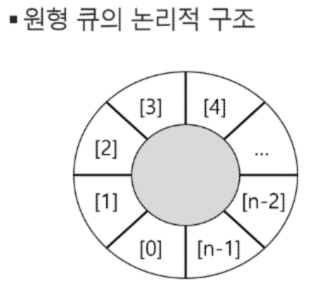

## 2. 원형 큐

In [ ]:
N = 4
Circle_Queue = [0] * N
front = 0
rear = 0

def EnQueue(data):
    global rear
    if (rear+1)%N == front:
        print('원형 큐 Full')
        return
    else:
        rear = (rear + 1) & N
        Circle_Queue[rear] = data

def DeQueue():
    global front
    front = (front + 1) & N
    return Circle_Queue(front)


### 원형 큐
1차원 배열을 사용하되, 논리적으로는 배열의 처음과 끝이 연결된 원형 형태의 큐를 이룬다고 가정하고 사용하는 것
- 메모리 누수 걱정없이 deQueue 가능
- 
#### 원형 큐의 구조
초기 공백 상태
- front = rear = 0

idx의 순환
- front와 rear의 위치가 마지막 idx(n-1)을 가리킨 후, 그 다음에는 논리적 순환을 이루어 배열의 처음 idx(0)으로 이동
- 나머지 연산자 mod를 사용하여 위의 연산 수행

front 변수 : 공백 상태와 포화 상태 구분을 쉽게 하기 위해 front가 있는 자리는 사용하지 않고 항상 빈자리로 둠

삽입 및 삭제 위치
1. 선형 큐
   - 삽입 위치 : rear = rear + 1
   - 삭제 위치 : front = front + 1
   - 포화 상태 : front + 1 == rear(엄밀히 말하면, front자리가 빈 상태)
2. 원형 큐
   - 삽입 위치 : rear = (rear + 1) mod n
   - 삭제 위치 : front = (front + 1) mod n
  
#### 원형 큐 구현
1. 초기 공백 큐 생성
    - 크기가 n인 1차원 배열 생성
    - front, end를 0으로 초기화
2. 공백상태 및 포화상태 검사 : isEmpty(), isFull()
   - 공백상태 : front == rear
   - 포화상태 : 삽입할 rear의 다음 위치 == 현재 front의 위치(rear+1(mod n) = front)

## 3. 우선순위 큐

### 우선순위 큐
우선순위를 가진 항목들을 저장하는 큐

#### 우선순위 큐의 특징
FIFO 순서가 아니라 우선순위가 높은 순서대로 먼저 나가게 된다

#### 우선순위 큐의 적용 분야
- 시뮬레이션 시스템
- 네트워크 트래픽 제어
- 운영체제의 테스크 스케줄링

#### 우선순위 큐의 구현
1. 배열을 이용한 우선순위 큐
2. 리스트를 이용한 우선순위 큐

#### 우선순위 큐의 기본 연산
- 삽입 : enQueue
- 삭제 : deQueue
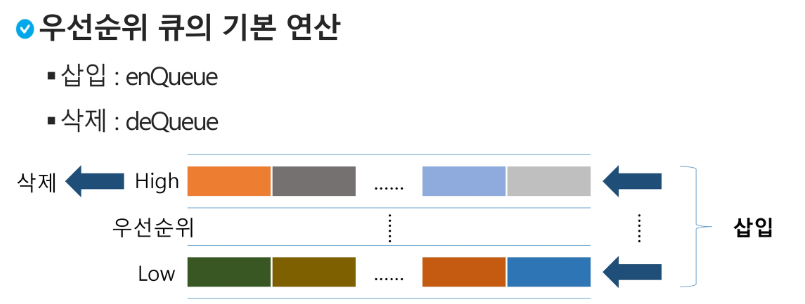

#### 배열을 이용한 우선순위 큐 구현
배열을 이용하여 자료 저장
- 원소 삽입 과정에서 우선순위를 비교하여 적절한 위치에 삽입
- 가장 앞에 최고 우선순위의 원소가 위치
#### 배열을 사용한 우선순위 큐 구현의 문제점
- 배열을 사용하므로, 삽입/삭제 연산에서 원소의 재배치 발생
- 메모리, 시간 낭비

### 큐의 활용

#### 큐의 활용 : 버프(Buffer)
버퍼 : 데이터를 한 곳에서 다른 곳으로 전송하는 동안 일시적으로 그 데이터를 보관하는 메모리 영역
- 버퍼링 : 버퍼를 활용하는 방식/버퍼를 채우는 동작
#### 버퍼의 자료 구조
- 입출력/네트워크와 관련된 기능에서 이용
- 순서대로 입력/출력/전달 -> FIFO 방식의 자료구조인 큐가 활용

In [21]:
from collections import deque

q = deque()
q.append(1)
q.append(2)
q.append(3)
print(q.popleft())
print(q.popleft())
print(q.popleft())

1
2
3


## 4. BFS

### BFS(Breath First Search)
탐색 시작점의 인접한 정점들을 먼저 모두 차례로 방문한 후에, 방문했던 정점을 시작점으로 하여 다시 인접한 정점들을 차례로 방문하는 방식
- 거리순 탐색이 유용한 경우 사용(정점과의 거리 관련 문제, 관계 분석 문제 등)
- 인접한 정점들에 대해 탐색 후, 차례로 다시 BFS를 진행
- 선입선출 형태의 자료구조인 큐 활용


In [14]:
# BFS
def BFS1(Graph, start, n):
    # n : 그래프의 노드 개수
    visited = [0] * (n+1)
    queue = []
    # 시작 노드를 enqueue
    queue.append(start)
    # 큐가 빌 때 까지 탐색
    while queue:
        # 큐에 가장 먼저 들어왔던(front) 값 삭제 후 반환하여 저장
        t = queue.pop(0)
        # 아직 해당 노드를 방문하지 않은 경우(start 포함)
        if not visited[t]:
            visited[t] = 1
            # visit(t) : 현재 방문 노드에서 할 일
            for i in Graph[t]:
                # 방문 노드의 인접 노드 중 아직 방문하지 않은 노드 : enqueue
                if not visited[i]:
                    queue.append(i)


# BFS 다른 모양(권장 방식) : enqueue 중복 방지
def BFS2(Graph, start, n):
    # 방문 배열 / 큐 초기화
    visited = [0] * (n+1) # 여기서 방문 배열은 곧 enqueue 된 적이 있는가를 의미(어차피 enqueue와 동시에 방문)
    queue = []
    # 시작 노드 enqueue & 방문 표시
    queue.append(start)
    visited[start] = 1
    # 큐가 빌 때 까지 진행
    while queue:
        # dequeue
        t = queue.pop()
        # visit(t)
        for i in Graph[t]:
            # 방문한 적이 없으면
            # 즉, enqueue 된 적이 없으면
            if not visited[i]:
                # enqueue & visited
                queue.append(i)
                # 아직 방문하지 않았음 -> 현재 방문중인 노드인 t에 의해 방문하게 되었다는 것을 표시
                # t의 인접 노드들인 i 중, 아직 방문하지 않았던(enqueue된 적이 없는) 노드들은
                # t에 의해서 enqueue가 되었고, 방문하게 되었다!
                visited[i] = visited[t] + 1


N = 5 # 노드 개수
E = 5 # 간선 개수
arr = list(map(int, input().split()))
adj = [[] for _ in range(N+1)]
for i in range(E):
    v1, v2 = arr[i*2], arr[i*2+1]
    adj[v1].append(v2)
    adj[v2].append(v1)
print(adj)

def BFS3(start, n):
    visited = [0] * (n+1)
    queue = []
    queue.append(start)
    visited[start] = 1
    while queue:
        t = queue.pop(0)
        print(t)
        for next in adj[t]:
            if visited[next] == 0:
                queue.append(next)
                visited[next] = visited[t] + 1
    return 'BFS Completed'

print(BFS3(1, N))


 1 2 1 3 2 4 2 5 3 5


[[], [2, 3], [1, 4, 5], [1, 5], [2], [2, 3]]
1
2
3
4
5
BFS Completed


In [19]:
# adjacent list 만드는 새로운 법(dict 이용)
# 인접행렬 : dict
# visited : set
V, E = map(int, input().split())
graph = {}
temp = list(map(int, input().split()))
print(temp)
for i in range(E):
    graph.setdefault(temp[2 * i], []).append(temp[2 * i + 1])
    graph.setdefault(temp[2 * i + 1], []).append(temp[2 * i])

def bfs(arr, start):
    visited = set()
    queue = [start] # 시작 노드 enqueue
    while queue:
        node = queue.pop(0)
        # 방문 여부 확인
        if node not in visited: # 해당 노드가 방문하지 않은 상태일 경우
            visited.add(node) # 방문 처리(.add() 메서드 사용)
            print(node, end = ' ') # 방문한 노드 출력
            neightbors = graph[node]
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)
print(bfs(temp, 1))

 7 8  
 1 2 1 3 1 4 2 4 3 5 4 6 4 5 5 6


[1, 2, 1, 3, 1, 4, 2, 4, 3, 5, 4, 6, 4, 5, 5, 6]
1 

NameError: name 'neighbors' is not defined

for i in range(E):
    graph.setdefault(temp[2 * i], []).append(temp[2 * i + 1])
    graph.setdefault(temp[2 * i + 1], []).append(temp[2 * i])

def bfs(arr, start):
    visited = set()
    queue = [start] # 시작 노드 enqueue
    while queue:
        node = queue.pop(0)
        # 방문 여부 확인
        if node not in visited: # 해당 노드가 방문하지 않은 상태일 경우
            visited.add(node) # 방문 처리(.add() 메서드 사용)
            print(node, end = ' ') # 방문한 노드 출력
            neightbors = graph[node]
            for neighbor in neighbors:
                if neighbor not in visited:
                    queue.append(neighbor)
                    